In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Simón Cortés Ocampo

*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

1.a)




Sea $θ$ el ángulo. El área de un segmento circular es igual a $ \frac{r^2}{2}(\theta - \sin\theta)$. El área de una circunferencia es igual a $\pi r^2$, y el cuarto de esto es $\frac{\pi r^2}{4}$. Igualando ambas expresiones tenemos:






$ \frac{r^2}{2}(\theta - \sin\theta) = \frac{\pi r^2}{4}$

$ \theta - \sin \theta = \frac{\pi r^2}{4} \times \frac{2}{r^2} $

$ \theta - \sin \theta = \frac{\pi}{2} $









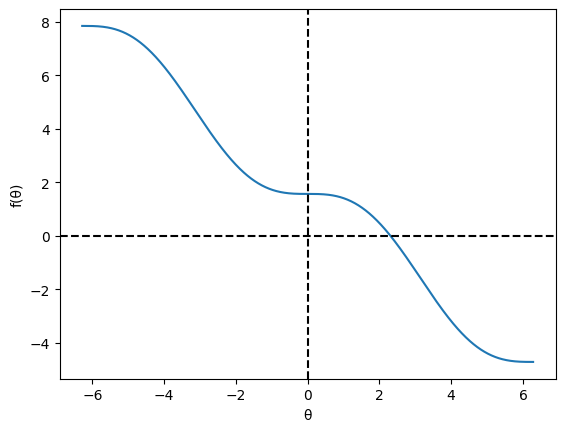

In [2]:
#1.b)

theta = np.linspace(-2*np.pi, 2 * np.pi, 1000)
y = np.pi/2 - theta + np.sin(theta)

plt.plot(theta, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('θ')
plt.ylabel('f(θ)')
plt.show()


La solución está entre 2 y 3

1.c)

$f(\theta)=\frac{\pi}{2}-\theta + \sin \theta$

In [3]:
#Bisección

def biseccion(f,a,b,tol=1e-8):
 if f(a)*f(b)>0:
  raise ValueError("f(a) y f(b) deben tener signos opuestos")
 i = 0
 while i < 100:
  c=(a+b)/2
  if abs(f(c))< tol:
    return c
  elif f(c)*f(a)<0:
    b=c
  else:
    a=c
  i+=1
 raise ValueError("No se encontró una solución en el intervalo dado")

In [4]:
f = lambda theta: np.pi/2 - theta + np.sin(theta)
raiz1 = biseccion(f,2,3)
print(f'La raíz con el método de bisección es {raiz1}')

La raíz con el método de bisección es 2.3098814636468887


In [5]:
#Punto fijo

def punto_fijo(f, x0, tol=1e-8):
  x_n = x0
  for n in range(1000):
    x_n1 = f(x_n)
    if abs(x_n1 - x_n) < tol:
      return x_n1
    x_n = x_n1
  raise ValueError("No se encontró una solución en el intervalo dado")

In [19]:
f = lambda theta: np.pi/2 + np.sin(theta)
raiz2 = punto_fijo(f,2)
print(f'La raíz con el método de punto fijo es {raiz2}')

La raíz con el método de punto fijo es 2.309881456674406


In [41]:
#Newton

def newton(f,df,x0,tol=1e-8):
  for i in range(100):
    f_x0 = f(x0)
    df_x0 = df(x0)
    if df_x0 == 0:
      raise ValueError("La derivada en x0 es cero")
    x1 = x0 - f_x0/df_x0
    if abs(x1 - x0) < tol:
      return x1
    x0 = x1


In [21]:
f = lambda theta: np.pi/2 - theta + np.sin(theta)
df = lambda theta: -1 + np.cos(theta)
raiz3 = newton(f,df,2)
print(f'La raíz con el método de Newton es {raiz3}')

La raíz con el método de Newton es 2.3098814600100575


In [9]:
#Secante

def secante(f, x0, x1, tol=1e-7, max_iter=100):
  for i in range(max_iter):
    f_x0 = f(x0)
    f_x1 = f(x1)
    if f_x1 - f_x0 == 0 :
      raise ValueError('La diferencia entre f(x1) y f(x0) es cero')
    x2 = x1 - (f_x1 * (x1 - x0) )/(f_x1 - f_x0)
    if abs(x2 - x1) < tol:
      return x2
    x0 = x1
    x1 = x2

  raise ValueError('No se encontró una solución en el intervalo dado')


In [10]:
f = lambda theta: np.pi/2 - theta + np.sin(theta)
raiz4 = secante(f,2,3)
print(f'La raiz con el método de la secante es {raiz4}')

La raiz con el método de la secante es 2.3098814600098123


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


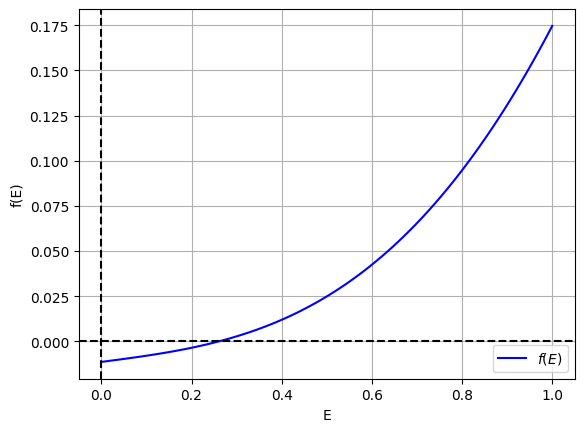

In [22]:
#a.

e = 0.9672671
T = 75.96
t0 = 1986.1113
t = 1986 + (91/365) #t para el 1 de abril

M = (2*np.pi/T)*(t-t0)

f_E = lambda E: E - e*np.sin(E) - M

E_val = np.linspace(0,1,100)
f_E_val = f_E(E_val)

plt.plot(E_val, f_E_val, 'b-', label='$f(E)$')
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
#Para encontrar E usamos el método de Newton:
df_E = lambda E: 1-e*np.cos(E)
E_sol = newton(f_E, df_E, 0.2)
print(f'Para el cometa Halley el 1 de abril de 1986, E = {E_sol}')

Para el cometa Halley el 1 de abril de 1986, E = 0.26125012038199036


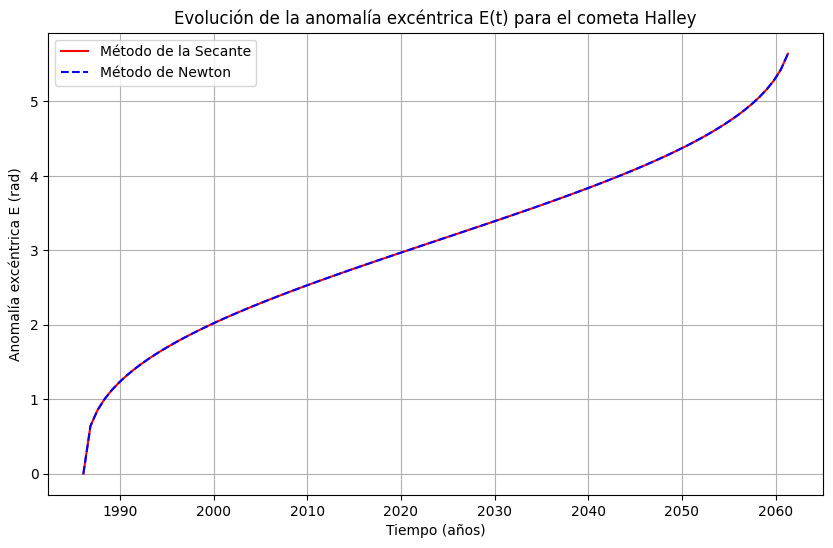

In [34]:
#b.

e = 0.9672671
T = 75.96
t0 = 1986.1113
dt = T/100

t_vals = np.array([t0 + i*dt for i in range(100)])
M_vals = np.zeros(100)
for i in range(100):
  M_vals[i] = (2*np.pi/T)*(t_vals[i] - t0)

#Método de Newton
def newton_raphson(M, e, tol=1e-6, max_iter=100):
  E = M
  for i in range(max_iter):
    f_E_ = E - e*np.sin(E) - M
    df_E_ = 1 - e*np.cos(E)
    if abs(df_E_ - E) < tol:
      break
    E_new = E - f_E_ / df_E_
    if abs(E_new - E) < tol:
      return E_new
    E = E_new
  return E

#Método de la secante
def secante_(M, tol=1e-6, max_iter=100):
  E0 = 0
  E1 = 2*np.pi
  for i in range(max_iter):
    f_E0 = E0 - e*np.sin(E0) - M
    f_E1 = E1 - e*np.sin(E1) - M
    E_new = E1 - f_E1 * (E1 - E0) / (f_E1 - f_E0)
    if abs(E_new - E1) < tol:
      return E_new
    E0, E1 = E1, E_new
  return E1

E_vals_newton = np.array([newton_raphson(M,e) for M in M_vals])
E_vals_secante = np.array([secante_(M) for M in M_vals])

plt.figure(figsize=(10, 6))
plt.plot(t_vals, E_vals_secante, label="Método de la Secante", linestyle="-", color="red")
plt.plot(t_vals, E_vals_newton, label="Método de Newton", linestyle="--", color="blue")
plt.xlabel("Tiempo (años)")
plt.ylabel("Anomalía excéntrica E (rad)")
plt.title("Evolución de la anomalía excéntrica E(t) para el cometa Halley")
plt.legend()
plt.grid()
plt.show()

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [42]:
#3.

from scipy.optimize import fixed_point

T = 0.5
f_m = lambda m: m- np.tanh(m/T)
df_m = lambda m: 1 - (1/T) * (1/np.cosh(m/T))**2

sol_newton = newton(f_m, df_m, 1)
sol_secante = secante(f_m, 1, 2)

print(f'La magnetización reducida empleando el metodo de la secante es {sol_secante:.4f}')
print(f'La magnetización reducida empleando el metodo de Newton-Raphson es {sol_newton:.4f}')

g_m = lambda m: np.tanh(m/T)

sol_punto_fijo = fixed_point(g_m, 1)

print(f'La magnetización reducida empleando el método de punto fijo es {sol_punto_fijo:.4f}')

La magnetización reducida empleando el metodo de la secante es 0.9575
La magnetización reducida empleando el metodo de Newton-Raphson es 0.9575
La magnetización reducida empleando el método de punto fijo es 0.9575


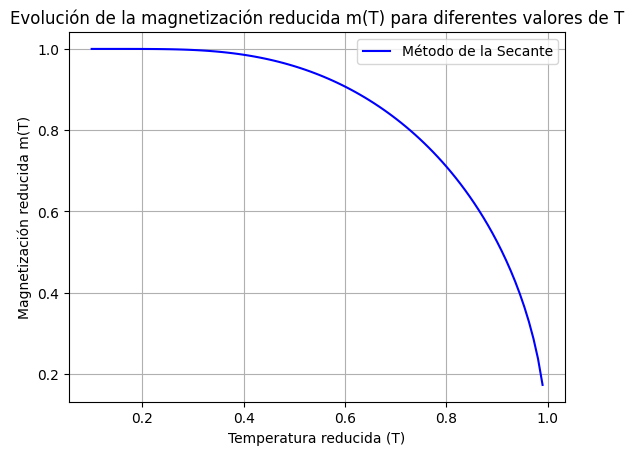

In [49]:
T_vals = np.linspace(0.1,0.99,100)
m_vals = []
for T in T_vals:
  def f_m(m):
    return m- np.tanh(m/T)

  m_sol = secante(f_m, 1, 2)
  m_vals.append(m_sol)

m_vals = np.array(m_vals)

plt.plot(T_vals, m_vals, label="Método de la Secante", linestyle="-", color="blue")
plt.xlabel("Temperatura reducida (T)")
plt.ylabel("Magnetización reducida m(T)")
plt.title("Evolución de la magnetización reducida m(T) para diferentes valores de T")
plt.legend()
plt.grid(True)
plt.show()
